# Simultaneous discrimination ttH vs ttW and ttbar

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
hd_ttH=pandas.read_hdf('../../Files/skimmed/ttH.h5', 'df')
hd_ttW=pandas.read_hdf('../../Files/skimmed/ttW.h5', 'df')
hd_ttbar=pandas.read_hdf('../../Files/skimmed/ttbar.h5', 'df')

In [5]:
with open("../VarList_def.json") as vardict:
    variablelist = json.load(vardict)[:]
    
#variablelist

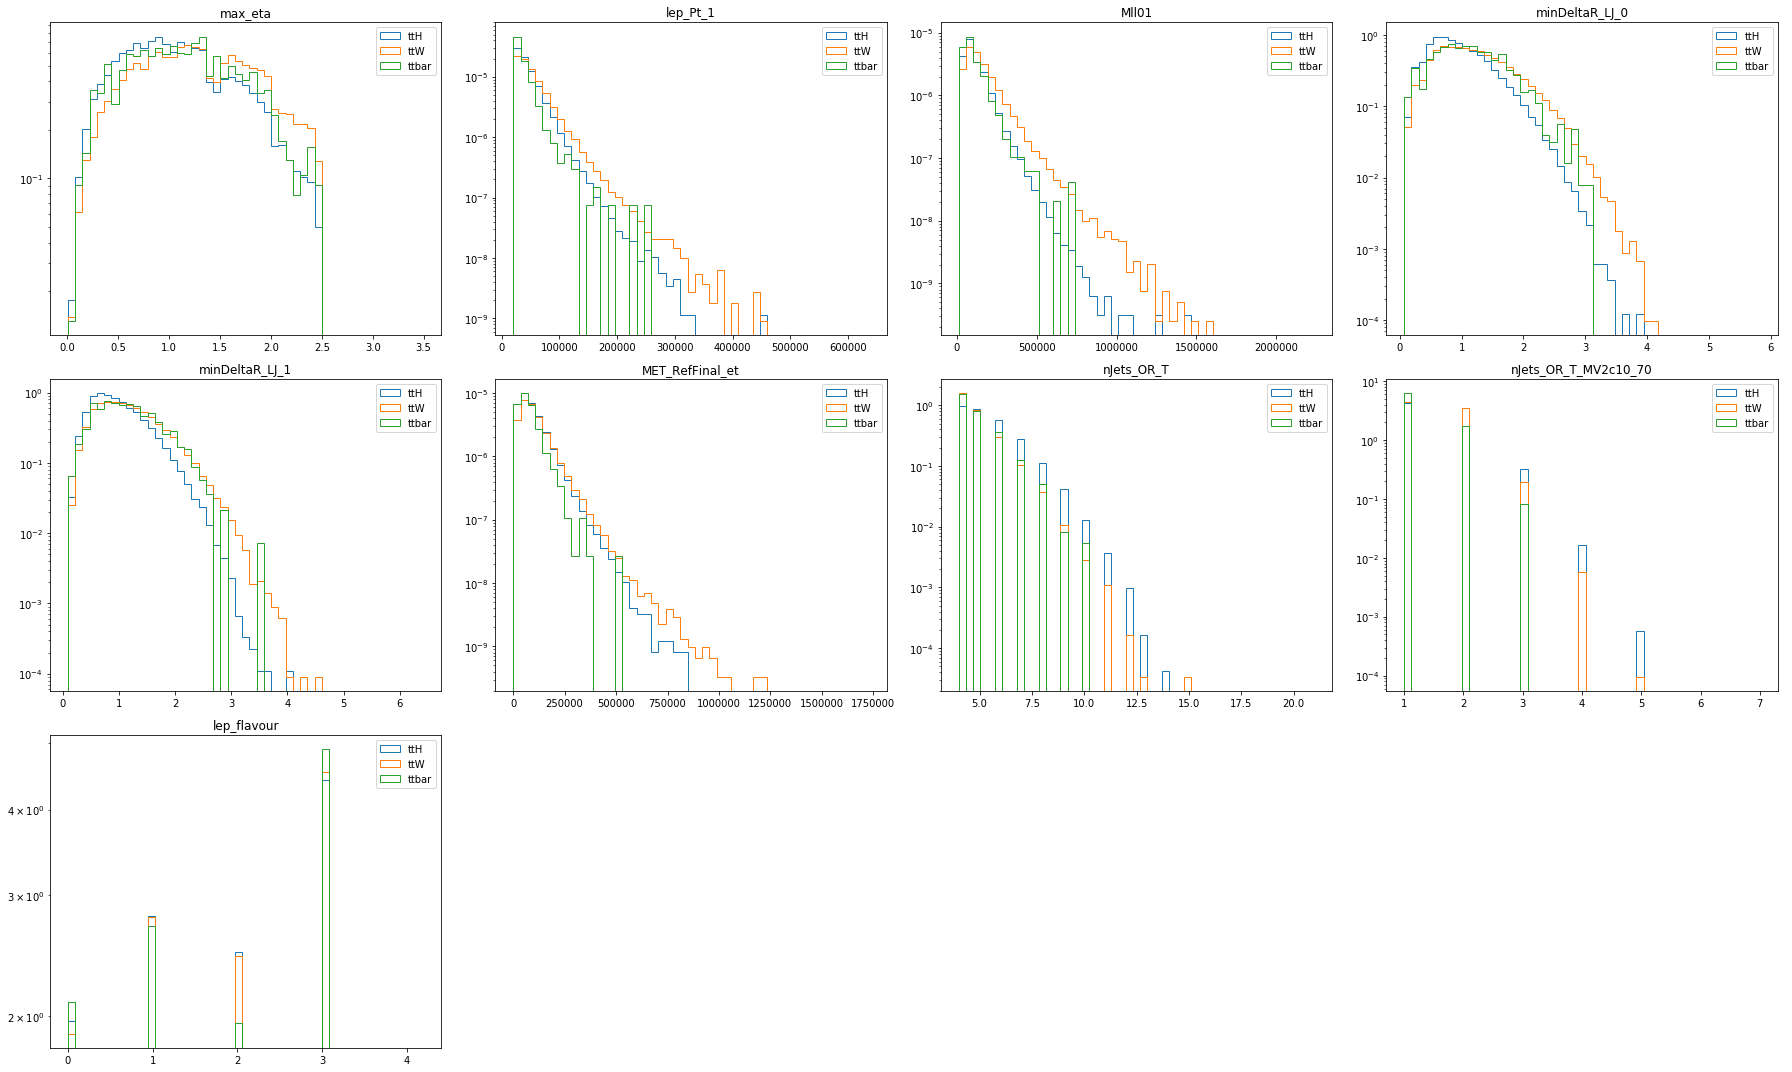

In [7]:
fig, ax = plt.subplots(3, 4, figsize=(25, 15))
nbins = 50

varcounter = -1
for i, axobjlist in enumerate(ax):
      for j, axobj in enumerate(axobjlist):
        varcounter+=1
        if varcounter < len(variablelist):
            var = variablelist[varcounter]
            p_ttH = pandas.DataFrame({var: hd_ttH[var]})
            p_ttW = pandas.DataFrame({var: hd_ttW[var]})
            p_ttbar = pandas.DataFrame({var: hd_ttbar[var]})
           
            minval = np.amin(p_ttH[var])
            maxval = max([np.amax(p_ttH[var]), np.amax(p_ttW[var]), np.amax(p_ttbar[var])])*1.4
            binning = np.linspace(minval,maxval,nbins)

            axobj.hist(p_ttH[var],binning,histtype=u'step',label='ttH',density=1) # color='orange',
            axobj.hist(p_ttW[var],binning,histtype=u'step', label='ttW',density=1) 
            axobj.hist(p_ttbar[var],binning,histtype=u'step', label='ttbar',density=1) 
            axobj.legend()
            axobj.set_yscale('log',nonposy='clip')
            axobj.set_title(variablelist[varcounter])

        else:
            axobj.axis('off')

plt.tight_layout()
plt.show()

In [8]:
ttH_vars=hd_ttH[variablelist]
ttW_vars=hd_ttW[variablelist]
ttbar_vars=hd_ttbar[variablelist]